In this project I will analyze  the results of political polls and answer some questions:

1. Who was being polled and what was their party affiliation? 

2. Did the poll results favor Trump or Clinton? 

3. How do undecided voters effect the poll?

4. Can we account for the undecided voters?

5. How did voter sentiment change over time?

6. Can we see an effect in the polls from the debates?


In [18]:
# For data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Use to grab data from the web(HTTP capabilities)
import requests

# Use StringIO to work with the csv file, the DataFrame will require a .read() method
from io import StringIO
import io

The data for the polls will be obtained from HuffPost Pollster.
https://elections.huffingtonpost.com/pollster

In [19]:
# This is the url link for the poll data in csv form
url = "https://elections.huffingtonpost.com/pollster/2016-general-election-trump-vs-clinton-vs-johnson.csv"

# Use requests to get the information in text form
source = requests.get(url).text

# Use StringIO to avoid an IO error with pandas
poll_data = StringIO(source) 


In [20]:
# Set poll data as pandas DataFrame
poll_df = pd.read_csv('2016 Election.csv')

# Let's get a glimpse at the data
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                1330 non-null   object 
 1   Start Date              1330 non-null   object 
 2   End Date                1330 non-null   object 
 3   Entry Date/Time (ET)    1330 non-null   object 
 4   Number of Observations  886 non-null    float64
 5   Population              1330 non-null   object 
 6   Mode                    1330 non-null   object 
 7   Trump                   1330 non-null   float64
 8   Clinton                 1330 non-null   float64
 9   Johnson                 346 non-null    float64
 10  Other                   914 non-null    float64
 11  Undecided               1256 non-null   float64
 12  Pollster URL            1330 non-null   object 
 13  Source URL              1330 non-null   object 
 14  Partisan                1330 non-null   

In [21]:
# Preview DataFrame
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Johnson,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,4.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,1.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,3.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,8.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,7.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


Text(0.5, 1.0, 'Number of Affiliates')

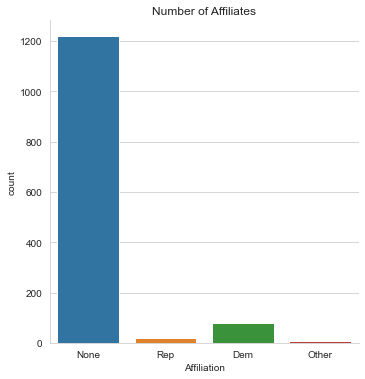

In [22]:
# Plot the Affiliation
sns.catplot(x='Affiliation',data=poll_df,kind='count')
plt.title('Number of Affiliates')


On the first chart we can see that most of the pools has no affiliation. And there is a larger amount of Democratic affiliation than Republicans.

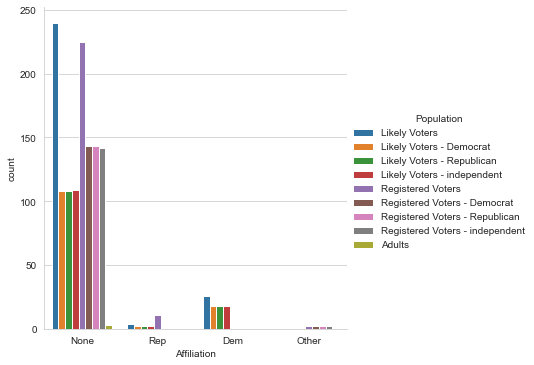

In [23]:
# Going deeeper to undersdant affiliation by population

sns.catplot(x='Affiliation',data=poll_df,hue='Population',kind='count')


On the second chart, we can see between the affiliations who is the population (Likely voters, Registered Voters and Adults). The large amount is no affiliation likely voters and Register voters.Also, there are more Republican Registered voters than Democrats

In [24]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Johnson,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,4.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,1.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,3.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,8.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,7.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


Let's go ahead and take a look at the averages for the three candidates.

<AxesSubplot:title={'center':'Candidates'}>

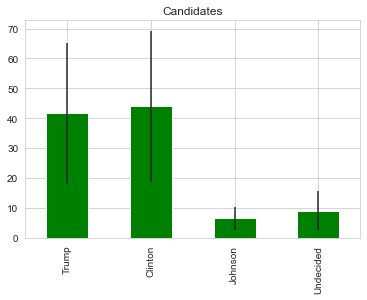

In [25]:
# First we'll get the average
avg = pd.DataFrame(poll_df.mean()) 
avg.drop('Number of Observations',axis=0,inplace=True)
avg.drop('Other',axis=0,inplace=True)
avg.drop('Question Iteration',axis=0,inplace=True)

# After that let's get the error
std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations',axis=0,inplace=True)
std.drop('Other',axis=0,inplace=True)
std.drop('Question Iteration',axis=0,inplace=True)

# now plot using pandas built-in plot, with kind='bar' and yerr='std'
avg.plot(yerr=std,kind='bar',legend=False,title = "Candidates",color='green')

Above the chart show the average sentiment of all polls. Where both main candidates are pretty close so the undecided volters can make a big difference

In [26]:
# Concatenate our Average and Std DataFrames
poll_avg = pd.concat([avg,std],axis=1)

#Rename columns
poll_avg.columns = ['Average','STD']

#Show
poll_avg

,Average,STD
Trump,41.638346,23.592908
Clinton,44.051128,25.193376
Johnson,6.563584,3.812680
Undecided,9.127389,6.402789


Looks like the polls indicate it as a fairly close race, but what about the undecided voters? Most of them will likely vote for one of the candidates once the election occurs. If we assume we split the undecided evenly between the two candidates the observed difference should be an unbiased estimate of the final difference.

In [27]:
# Take a look at the DataFrame again
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Johnson,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,4.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,1.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,3.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,8.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,7.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


In [28]:
# For timestamps
from datetime import datetime

Now we'll define a new column in our poll_df DataFrame to take into account the difference between Trump and Clinton in the polls.


In [29]:
# Create a new column for the difference between the two candidates

poll_df['Difference'] = (poll_df.Trump - poll_df.Clinton)/100
# Preview the new column
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Johnson,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,4.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.04
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,1.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.83
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,3.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.75
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,8.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.05
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,7.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1,0.02


Difference column is Trump minus Clinton, thus a positive difference indicates a leaning towards Trump in the polls.

Now let's go ahead and see if we can visualize how this sentiment in difference changes over time. We will start by using groupby to group the polls by their start data and then sorting it by that Start Date.

In [30]:
# Set as_index=False to keep the 0,1,2,... index. Then we'll take the mean of the polls on that day. 
poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()

# Let's go ahead and see what this looks like
poll_df.head()

,Start Date,Number of Observations,Trump,Clinton,Johnson,Other,Undecided,Question Iteration,Difference
0,2015-05-19,1046.00,34.25,48.75,NaN,2.5,14.00,1.0,-0.1450
1,2015-06-20,420.75,35.00,47.25,NaN,NaN,17.75,1.0,-0.1225
2,2015-06-21,1005.00,34.00,51.00,NaN,3.0,12.00,1.0,-0.1700
3,2015-06-26,890.00,36.75,57.00,NaN,6.0,0.00,1.0,-0.2025
4,2015-07-09,499.25,35.25,49.50,NaN,NaN,16.00,1.0,-0.1425


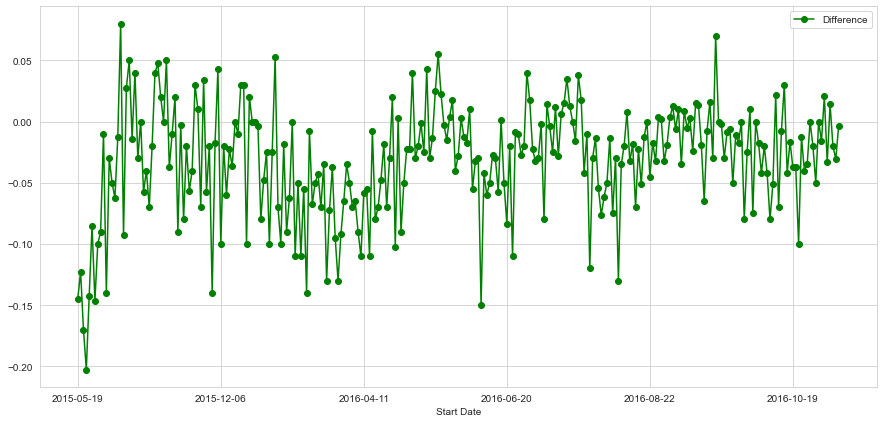

In [36]:
# Plotting the difference in polls between Obama and Romney
fig = poll_df.plot('Start Date','Difference',figsize=(15,7),marker='o',linestyle='-',color='green')

Because the chart shows the diference btw Trump and Clinton, a positive difference indicates a leaning towards Trump in the polls. You can see that Hillary started on a better position and over time the sentiment mixed with picks in favor of trump.

It would be very interesting to plot marker lines on the dates of the debates and see if there is any general insight to the poll results.

The debate dates were Sept 26th, Oct 09th, and Oct 19th. Let's plot some lines as markers and then zoom in on the month of October.

In order to find where to set the x limits for the figure we need to find out where the index for the month of October in 2012 is. Here's a simple for loop to find that row. Note, the string format of the date makes this difficult to do without using a lambda expression or a map.

In [50]:
# Set row count and xlimit list
row_in = 0
xlimit = []

# Cycle through dates until 2012-10 is found, then print row index
for date in poll_df['Start Date']:
    if date[0:7] == '2016-09':
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in += 1
        
print (min (xlimit))
print (max(xlimit))

209
231


Now we know where to set our x limits for the month of October in our figure.

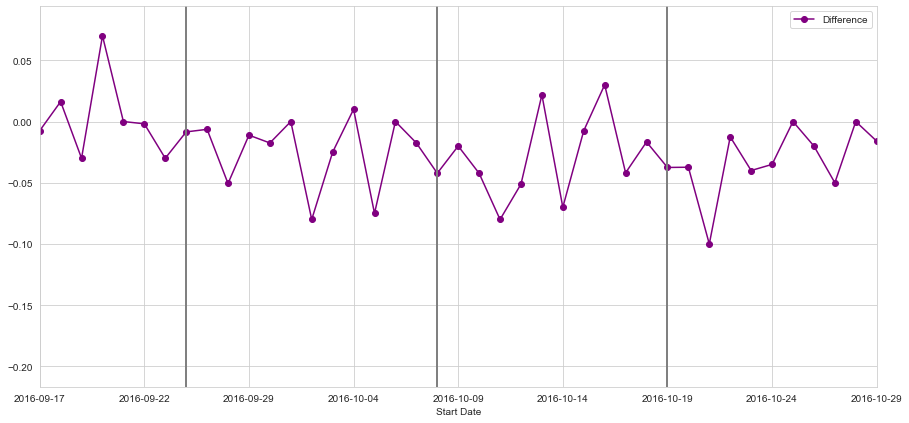

In [37]:
# Start with original figure
fig = poll_df.plot('Start Date','Difference',figsize=(15,7),marker='o',linestyle='-',color='purple',xlim=(220,260))

# Now add the debate markers. Got in wikipedia the dates

#Sept 26th
plt.axvline(x=220+7, linewidth=2, color='grey')
#Oct 09th
plt.axvline(x=220+19, linewidth=2, color='grey')
#Oct 19th
plt.axvline(x=220+30, linewidth=2, color='grey')

According to the debates lines printed on the chart, we can see the sentiment changing up to october.